In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [18]:
df = pd.read_csv("comfort_data.csv")

In [21]:
# EDA
df.head()
df.isnull().sum()
object_columns = df.select_dtypes(['object']).columns.to_list()
df[object_columns] = df[object_columns].astype('category')

cat_columns = df.select_dtypes(['category']).columns.to_list()
for col in cat_columns:
    print(df[col].value_counts())

Fan
off    74
on     26
Name: count, dtype: int64
AC
off    61
on     39
Name: count, dtype: int64
Lights
on     54
off    46
Name: count, dtype: int64
Blinds
off    54
on     46
Name: count, dtype: int64
Comfort_Level
Uncomfortable    71
Comfortable      29
Name: count, dtype: int64


In [26]:
#Change this to only apply on training data in future
for col in cat_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])


In [35]:
# Model Training
X_cols = df.columns.to_list()[:-1]
Y_cols = df.columns[-1]

X = df[X_cols]
Y = df[Y_cols]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,Y_train)

Y_preds = clf.predict(X_test)
print("Accuracy : ",accuracy_score(Y_test,Y_preds))
print("F1 Score : ",f1_score(Y_test,Y_preds))

cm = confusion_matrix(Y_test,Y_preds)
print("Confusion Matrix: ",cm)


Accuracy :  1.0
F1 Score :  1.0
Confusion Matrix:  [[ 6  0]
 [ 0 14]]


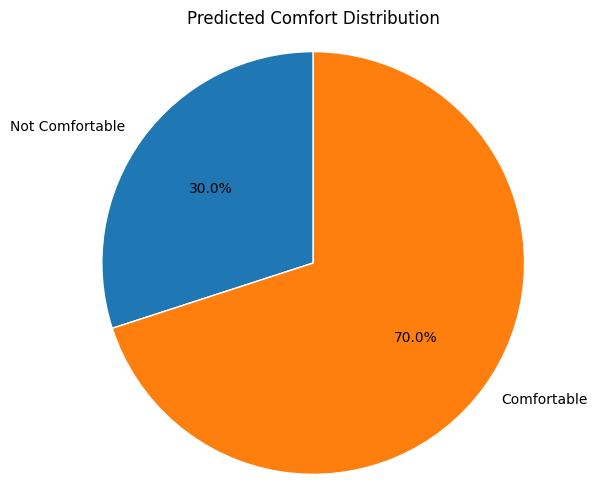

In [ ]:
#Pie Chart
predictions = np.array(Y_preds)
counts = np.bincount(predictions)
labels = ['Not Comfortable', 'Comfortable']
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(edgecolor='w')
)
plt.title('Predicted Comfort Distribution')
plt.axis('equal')
plt.show()
